Airline Passenger Forecasting Using Arimax

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("C:/Recent Download/Airline.csv")

In [3]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
data.isnull().sum()

Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    1
dtype: int64

In [5]:
data.tail()


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
data.rename({'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Passengers'},axis=1,inplace=True)

In [7]:
data.dropna(inplace=True)

In [8]:
data.tail()

,Month,Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [9]:
data['Month']=pd.to_datetime(data['Month'])

In [10]:
data.set_index(['Month'],inplace=True)

In [11]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [12]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<AxesSubplot:xlabel='Month'>

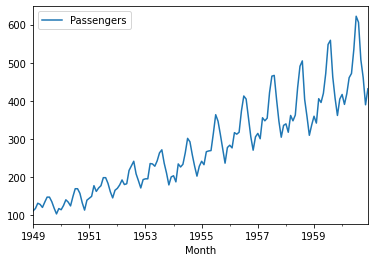

In [13]:
#Visualization
data.plot()

In [14]:
#Test of Stationary
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Passengers'])

In [15]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels=['ADF Test Statistic','p-value','lag used','Number of Observations used']
    for value,label in zip(result,labels):
        print(label+ ':'+str(value))
    if result[1]<=0.05:
        print('Reject null Hypo.Data has no unit root and is Stationary')
    else:
        print('Reject alternative hypo.Data has unit roots and is not Stationary.' )

In [16]:
adfuller_test(data['Passengers'])

ADF Test Statistic:0.8153688792060482
p-value:0.991880243437641
lag used:13
Number of Observations used:130
Reject alternative hypo.Data has unit roots and is not Stationary.


In [17]:
#Differencing
data['Seasonal Difference']=data['Passengers']-data['Passengers'].shift(12)

In [18]:
data.head(14)

,Passengers,Seasonal Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
1949-06-01,135.0,NaN
1949-07-01,148.0,NaN
1949-08-01,148.0,NaN
1949-09-01,136.0,NaN


In [19]:
adfuller_test(data['Seasonal Difference'].dropna())

ADF Test Statistic:-3.383020726492481
p-value:0.011551493085514952
lag used:1
Number of Observations used:130
Reject null Hypo.Data has no unit root and is Stationary


<AxesSubplot:xlabel='Month'>

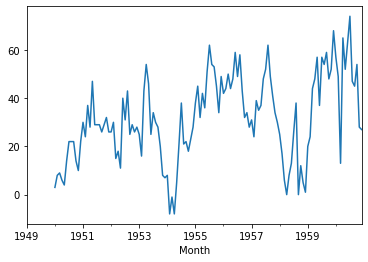

In [20]:
data['Seasonal Difference'].plot()

In [21]:
#Auto Regressor
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

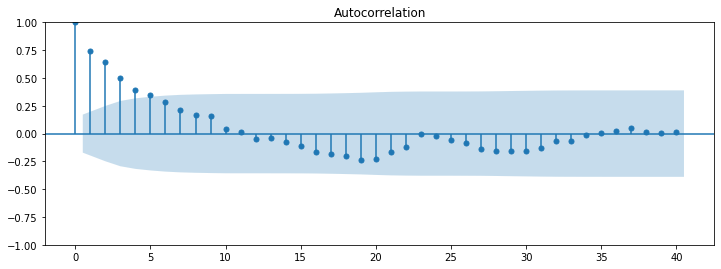

In [22]:
fig=plt.figure(figsize=(12,9))
ax1=fig.add_subplot(211)
fig= sm.graphics.tsaplots.plot_acf(data['Seasonal Difference'].iloc[13:],lags=40,ax=ax1)

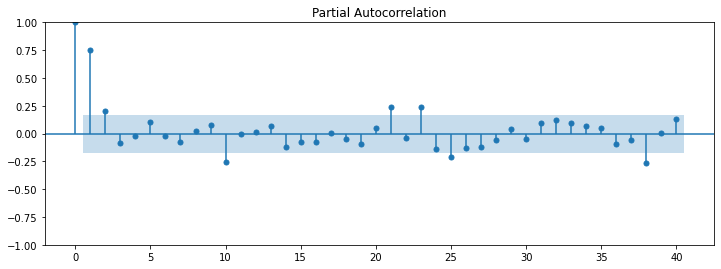

In [23]:
fig=plt.figure(figsize=(12,9))
ax2=fig.add_subplot(211)
fig= sm.graphics.tsaplots.plot_pacf(data['Seasonal Difference'].iloc[13:],lags=40,ax=ax2)

In [24]:
from statsmodels.tsa.statespace import sarimax 
import statsmodels.api as sm

In [26]:
model=sm.tsa.statespace.SARIMAX(data['Passengers'],order=(1,1,1),seasonal_order=(1,1,2,12))
results=model.fit()

C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

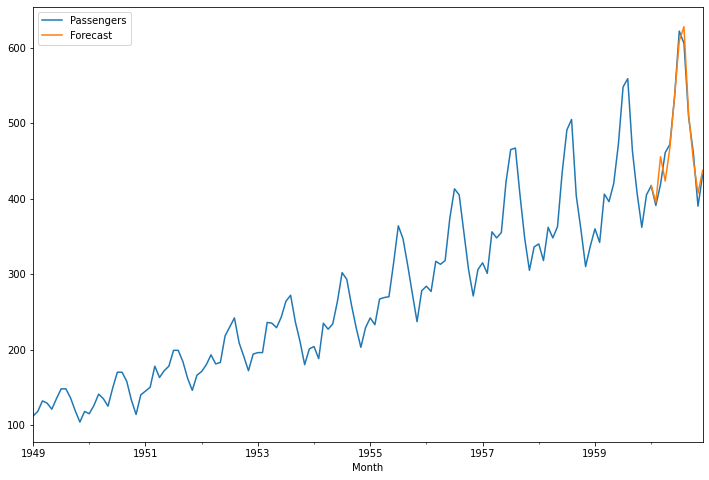

In [27]:
data['Forecast']=results.predict(start=132,end=144)
data[['Passengers','Forecast']].plot(figsize=(12,8))

In [28]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [29]:
future_dates_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_dates_data.tail()

,Passengers,Seasonal Difference,Forecast
1962-07-01,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN


In [30]:
future_data=pd.concat([data,future_dates_data])

<AxesSubplot:>

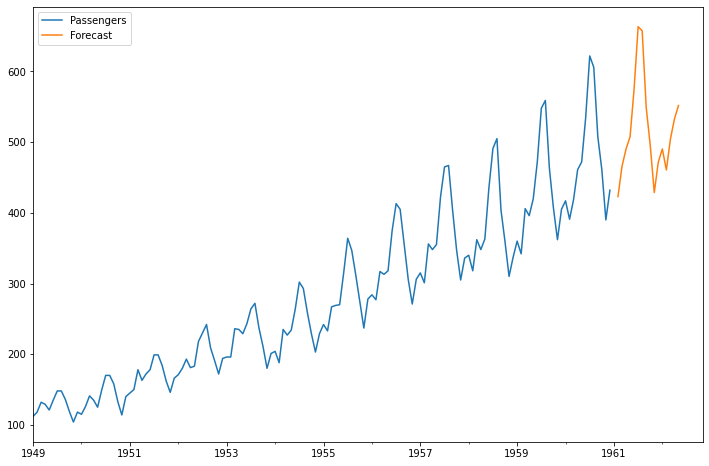

In [31]:
future_data['Forecast']=results.predict(start=145,end=160)
future_data[['Passengers','Forecast']].plot(figsize=(12,8))